# Flights example

In [1]:
import numpy as np
import pandas
from IPython.core.display import display

import raha

In [2]:
datasets = []

for i in range(10):
    from raha import analysis_utilities
    app_1 = raha.Detection()
    app_2 = raha.Correction()

    # How many tuples would you label?
    app_1.LABELING_BUDGET = 20
    app_2.LABELING_BUDGET = 0

    # Would you like to see the logs?
    app_1.VERBOSE = False
    app_2.VERBOSE = False

    dataset_dictionary = {
        "name": "flights",
        "path": "datasets/flights/dirty.csv",
        "clean_path": "datasets/flights/clean.csv"
    }
    d = app_1.initialize_dataset(dataset_dictionary)

    app_1.run_strategies(d)
    app_1.generate_features(d)
    app_1.build_clusters(d)

    while len(d.labeled_tuples) < app_1.LABELING_BUDGET:
        app_1.sample_tuple(d)
        if d.has_ground_truth:
            app_1.label_with_ground_truth(d)

    app_1.propagate_labels(d)
    app_1.predict_labels(d)

    app_2.initialize_models(d)
    app_2.initialize_dataset(d)
    for si in d.labeled_tuples:
        d.sampled_tuple = si
        app_2.update_models(d)
        app_2.generate_features(d)
        app_2.predict_corrections(d)

    print(f"Run {i} done")

    datasets.append(d)

I just load strategies' results as they have already been run on the dataset!


Run 0 done


I just load strategies' results as they have already been run on the dataset!


Run 1 done


I just load strategies' results as they have already been run on the dataset!


Run 2 done


I just load strategies' results as they have already been run on the dataset!


Run 3 done


I just load strategies' results as they have already been run on the dataset!


Run 4 done


I just load strategies' results as they have already been run on the dataset!


Run 5 done


I just load strategies' results as they have already been run on the dataset!


Run 6 done


I just load strategies' results as they have already been run on the dataset!


Run 7 done


I just load strategies' results as they have already been run on the dataset!


Run 8 done


I just load strategies' results as they have already been run on the dataset!


Run 9 done


## Evaluation

In [3]:
evaluation_df = pandas.DataFrame(columns=["Task", "Precision", "Recall", "F1 Score"])

for d in datasets:
    edp, edr, edf = d.get_data_cleaning_evaluation(d.detected_cells)[:3]
    ecp, ecr, ecf = d.get_data_cleaning_evaluation(d.corrected_cells)[-3:]

    evaluation_df = evaluation_df.append({"Task": "Error Detection (Raha)", "Precision": edp,
                                          "Recall": edr, "F1 Score": edf}, ignore_index=True)
    evaluation_df = evaluation_df.append({"Task": "Error Correction (Baran)", "Precision": ecp,
                                          "Recall": ecr, "F1 Score": ecf}, ignore_index=True)
display(evaluation_df)

evaluation_df.groupby("Task").agg(["mean", "std", "min", "max"])

/home/adrian/source/MA/raha/raha/dataset.py:123: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if correction_dictionary[cell] == actual_errors[cell]:


,Task,Precision,Recall,F1 Score
0,Error Detection (Raha),0.892382,0.830894,0.860541
1,Error Correction (Baran),0.778986,0.640447,0.702956
2,Error Detection (Raha),0.817333,0.818496,0.817914
3,Error Correction (Baran),0.762683,0.550000,0.639112
4,Error Detection (Raha),0.879244,0.831707,0.854815
5,Error Correction (Baran),0.865794,0.578252,0.693395
6,Error Detection (Raha),0.811794,0.861789,0.836045
7,Error Correction (Baran),0.719086,0.556707,0.627563
8,Error Detection (Raha),0.753571,0.943496,0.837906
9,Error Correction (Baran),0.779672,0.492683,0.603811


Precision                                  Recall  \
                              mean       std       min       max      mean   
Task                                                                         
Error Correction (Baran)  0.804134  0.069315  0.710878  0.929613  0.542927   
Error Detection (Raha)    0.828861  0.052856  0.734158  0.892382  0.852988   

                                                        F1 Score            \
                               std       min       max      mean       std   
Task                                                                         
Error Correction (Baran)  0.049765  0.454268  0.640447  0.646447  0.044374   
Error Detection (Raha)    0.037524  0.817276  0.943496  0.838866  0.019761   

                                              
                               min       max  
Task                                          
Error Correction (Baran)  0.554315  0.702956  
Error Detection (Raha)    0.800776  0.862565

## Analyze the alternative repairs

In [4]:
alternative_count_list = []

for d in datasets:
    number_of_repairs = len(d.correction_collection)
    number_of_repairs_hist = dict()

    for cell_repairs in d.correction_collection.values():
        num = len(cell_repairs)
        number_of_repairs_hist[num] = number_of_repairs_hist.get(num, 0) + 1

    hist = [0] * (max(number_of_repairs_hist.keys()) + 1)
    for num, count in number_of_repairs_hist.items():
        hist[num] = count

    alternative_count_list.append(number_of_repairs_hist)

    #print(f"Histogram of the number of alternative repairs: {list(enumerate(hist))}")

max_alternatives = max(len(h) for h in alternative_count_list)

alternative_count_df = pandas.DataFrame(columns=list(range(max_alternatives + 1)))

for hist in alternative_count_list:
    alternative_count_df = alternative_count_df.append(hist, ignore_index=True)

alternative_count_df.drop(0,axis=1,inplace=True)
alternative_count_df = alternative_count_df.fillna(0)
alternative_count_df

,1,2,3,4
0,3568.0,390.0,18.0,19.0
1,3346.0,133.0,17.0,0.0
2,3051.0,177.0,15.0,0.0
3,3346.0,403.0,10.0,1.0
4,2981.0,76.0,0.0,0.0
5,2964.0,180.0,6.0,0.0
6,3125.0,16.0,0.0,0.0
7,2985.0,107.0,7.0,0.0
8,3082.0,182.0,6.0,7.0
9,2472.0,226.0,0.0,0.0


In [5]:
mean_number_of_repairs = (alternative_count_df * np.arange(1,max_alternatives+1,1)).sum(axis=1) / alternative_count_df.sum(axis=1)
mean_number_of_repairs.agg(["mean", "std", "min", "max"])

mean    1.062512
std     0.036418
min     1.005094
max     1.120901
dtype: float64

In [6]:
more_than_one = alternative_count_df.loc[:, alternative_count_df.columns[1:]].sum(axis=1) / alternative_count_df.sum(axis=1)
more_than_one.agg(["mean", "std", "min", "max"])

mean    0.058816
std     0.033898
min     0.005094
max     0.110106
dtype: float64

In [7]:
print("Mean number of cells with x predicted alternatives in 10 runs")
mean_count_series = alternative_count_df.mean()
mean_count_series

Mean number of cells with x predicted alternatives in 10 runs


1    3092.0
2     189.0
3       7.9
4       2.7
dtype: float64

In [10]:
correct_repairs = datasets[0].get_actual_errors_dictionary()

collection = []
correct_repair_probs = []
incorrect_repair_probs = []
other_repair_probs = []

for d in datasets:
    error_repaired_cells = [cell for cell, correction in d.corrected_cells.items() if cell in correct_repairs and correction != correct_repairs[cell]]
    #print(f"Number of incorrectly repaired cells: {len(error_repaired_cells)}")

    correct_repair_available = 0

    for cell in error_repaired_cells:
        if correct_repairs[cell] in d.correction_collection[cell].keys():
            correct_repair_available += 1

    #print(f"Number of incorrectly repaired cells, where the correct repair is among the alternative repairs: {correct_repair_available}")

    collection.append((len(error_repaired_cells),correct_repair_available))

    for cell in error_repaired_cells:
        if correct_repairs[cell] in d.correction_collection[cell]:
            correct_repair_probs.append(d.correction_collection[cell][correct_repairs[cell]])
            incorrect_repair_probs.append(d.correction_confidences[cell])
            other_repair_probs.append([prob for val, prob in d.correction_collection[cell].items()
                                       if val not in [correct_repairs[cell], d.corrected_cells[cell]]])

repairable_df = pandas.DataFrame(collection, columns=["errors","repairs"])
repairable_df["repair_percentage"] = repairable_df["repairs"] / repairable_df["errors"]
print(repairable_df["repair_percentage"].agg(["mean", "std", "min", "max"]))

mean    0.128420
std     0.095999
min     0.003676
max     0.287402
Name: repair_percentage, dtype: float64


In [11]:
print(pandas.Series(correct_repair_probs).agg(["mean", "std", "min", "max"]))

np.histogram(correct_repair_probs,np.linspace(0.5,1.0,101))

mean    0.874177
std     0.171195
min     0.503317
max     1.000000
dtype: float64


(array([ 30,   8,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          0,   0,   8,   0,   0,   0,   0,  10,   0,   0,   0,   0,   0,
          0,  14,   5,   0,   3,   2,   0,   1,  13,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          3,   5,  17,   0,   0,   0,   0,   0,   0,   0,  16,   7,   2,
          0,   0,   0,   0,   0,   2,   0,   0,   0,   2,   0,   0,   0,
          0,   2,   0,   0,   0,   0,   0,  12,  27,   0,   0,   0,   0,
          0,   0,  10,   0,  23,   5,  29,  43, 147]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
        0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
        

In [12]:
print(pandas.Series(incorrect_repair_probs).agg(["mean", "std", "min", "max"]))

np.histogram(incorrect_repair_probs,np.linspace(0.5,1.0,101))

mean    0.870292
std     0.178566
min     0.502536
max     1.000000
dtype: float64


(array([15,  1, 10, 12,  9,  0, 16,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  0, 22,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0, 11,  6,  0,  0,  0,  0,  6,  5,  0,  0,  0,  0,  2,
         0,  0,  0,  0, 15,  0,  8, 20, 11,  0,  9,  0, 57, 94, 76]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
        0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
        0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 ,
        0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.8

In [13]:
flat_others = [value for sublist in other_repair_probs for value in sublist]

print(pandas.Series(flat_others).agg(["mean", "std", "min", "max"]))

np.histogram(flat_others,np.linspace(0.5, 1.0, 101))

mean    0.918885
std     0.118925
min     0.501722
max     0.999993
dtype: float64


(array([2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 9, 5, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 4, 8, 4, 8]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
        0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
        0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 ,
        0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 , 0.855,
        0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895, 0.9  ,
        0.905, 0.91

In [14]:
correct_s = pandas.Series(correct_repair_probs)
incorrect_s = pandas.Series(incorrect_repair_probs)
max_other_s = pandas.Series(max(other + [0]) for other in other_repair_probs)

print(len(correct_s))

print((correct_s > max_other_s).sum() / len(correct_s))
print((correct_s > incorrect_s).sum() / len(correct_s))
print((correct_s == incorrect_s).sum() / len(correct_s))
print((correct_s >= incorrect_s).sum() / len(correct_s))
print(((correct_s > incorrect_s) & (correct_s > max_other_s)).sum() / len(correct_s))
print(((correct_s == incorrect_s) & (correct_s > max_other_s)).sum() / len(correct_s))
print(((correct_s >= incorrect_s) & (correct_s > max_other_s)).sum() / len(correct_s))
print(((correct_s >= incorrect_s) | (max_other_s >= incorrect_s)).sum() / len(correct_s))

abs(correct_s - incorrect_s).describe()

450
0.9733333333333334
0.39555555555555555
0.08666666666666667
0.4822222222222222
0.39555555555555555
0.08666666666666667
0.4822222222222222
0.4911111111111111


count    450.000000
mean       0.089384
std        0.144923
min        0.000000
25%        0.001566
50%        0.021243
75%        0.085252
max        0.496652
dtype: float64

In [15]:
other_count = pandas.Series(len(other) for other in other_repair_probs)
print((other_count == 0).sum() / len(other_count))

print(((correct_s > max_other_s) & (other_count > 0)).sum() / (other_count > 0).sum())

0.9111111111111111
0.7


In [16]:
incorrect_repair_probs_full = []
max_other_repair_probs = []

for d in datasets:
    error_repaired_cells = [cell for cell, correction in d.corrected_cells.items() if cell in correct_repairs and correction != correct_repairs[cell]]

    for cell in error_repaired_cells:
        incorrect_repair_probs_full.append(d.correction_confidences[cell])
        max_other_repair_probs.append(max([prob for val, prob in d.correction_collection[cell].items()
                                   if val != d.corrected_cells[cell]] + [0]))

In [17]:
print(len(incorrect_repair_probs_full))
print(len(max_other_repair_probs))

incorrect_repair_probs_full = pandas.Series(incorrect_repair_probs_full)
max_other_repair_probs = pandas.Series(max_other_repair_probs)

print((max_other_repair_probs > incorrect_repair_probs_full).sum() / len(max_other_repair_probs))
print((max_other_repair_probs == incorrect_repair_probs_full).sum() / len(max_other_repair_probs))

print(incorrect_repair_probs_full.agg(["mean", "std", "min", "max"]))

np.histogram(incorrect_repair_probs_full, np.linspace(0.5,1.0,101))

3430
3430
0.07871720116618076
0.021865889212827987
mean    0.866809
std     0.170465
min     0.500000
max     1.000000
dtype: float64


(array([  38,    4,   38,   62,   11,   33,   64,   10,   26,    6,    3,
          25,   21,   26,    0,    4,   10,   68,   20,    6,    0,    4,
           2,    0,    2,    4,    8,   18,   10,    0,    4,    0,   52,
          54,    0,    0,    0,    0,    0,   38,    0,   71,    0,    0,
          83,   53,    6,  146,    3,    0,   61,   29,    0,    1,    0,
          13,    0,    9,    0,   13,   15,    0,   29,    3,    1,   46,
           4,    2,    0,    3,    0,    0,   13,    7,    0,    7,    0,
           3,   11,    8,    3,    3,   22,    8,   35,    0,    2,    0,
           0,   33,    1,   67,   78,   74,    7,   48,   70,  112,  177,
        1379]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695

## Analyze confidence vs error probability

In [18]:
import importlib
from raha import analysis_utilities
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.ion()

In [19]:
importlib.reload(analysis_utilities)

<module 'raha.analysis_utilities' from '/home/adrian/source/MA/raha/raha/analysis_utilities.py'>

In [20]:
r_p_dfs = []

for d in datasets:

    r_p_dfs.append(analysis_utilities.get_correction_confidence_df(d))

r_p_df = pandas.concat(r_p_dfs)

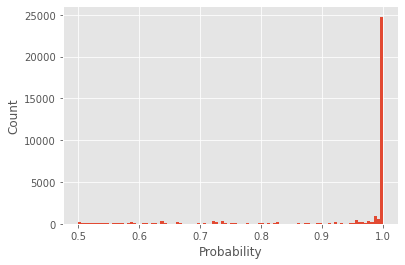

In [21]:
analysis_utilities.correction_confidence_distribution(r_p_df, number_of_bins=100)

In [22]:
(r_p_df["confidence"] >= 0.95).sum() / len(r_p_df.index)

0.8322051159168514

In [23]:
((r_p_df["confidence"] >= 0.95) & (r_p_df["detection_correct"] == False)).sum() / (r_p_df["detection_correct"] == False).sum()

0.6630702836004932

In [24]:
((r_p_df["confidence"] >= 0.95) & (r_p_df["detection_correct"] == True)).sum() / (r_p_df["detection_correct"] == True).sum()

0.8504080684758808

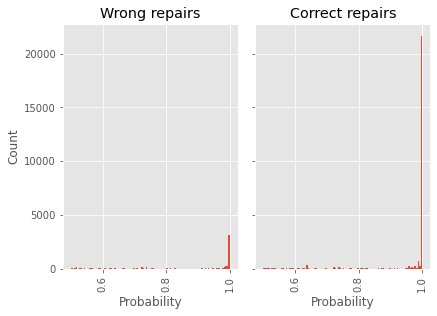

In [25]:
analysis_utilities.correction_confidence_distributions(r_p_df, number_of_bins=100)

In [26]:
analysis_utilities.correction_confidence_distribution(r_p_df, number_of_bins=100).savefig("flights_correction_overview.pdf")
analysis_utilities.correction_confidence_distributions(r_p_df, number_of_bins=100).savefig("flights_correction_split.pdf")

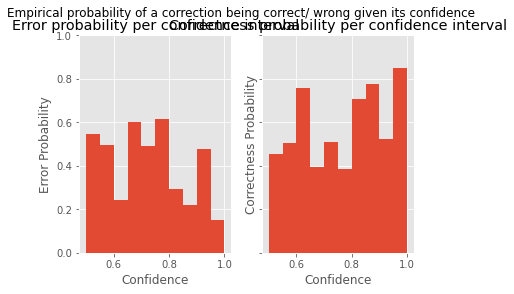

In [27]:
display(analysis_utilities.correction_correctness_by_confidence(r_p_df, number_of_bins=10))

## Analyze detection confidence vs error probability

In [28]:
evaluation_dfs = []

for d in datasets:
    df = analysis_utilities.get_detection_evaluation_df(d)
    evaluation_dfs.append(df)
    #display(df)
    #display(df.value_counts(subset=["detected", "truth"]))
    #display(analysis_utilities.detection_evaluation(df))
    #display(analysis_utilities.detection_correctness_by_confidence(df,number_of_bins=10))

df = pandas.concat(evaluation_dfs)

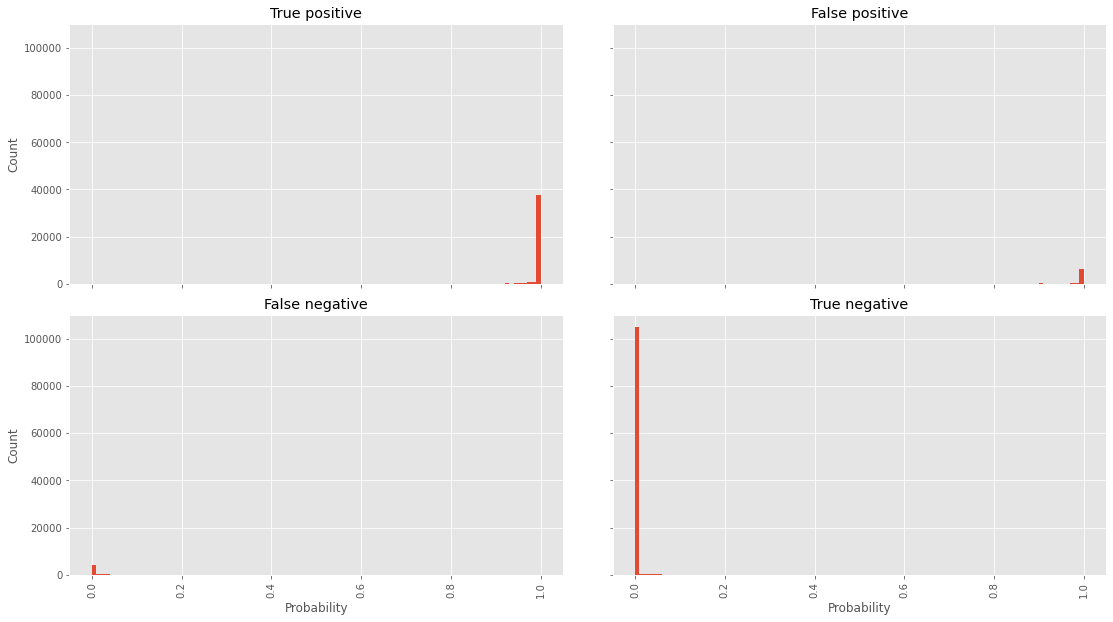

In [29]:
analysis_utilities.detection_evaluation(df, sharey="all", number_of_bins=100)

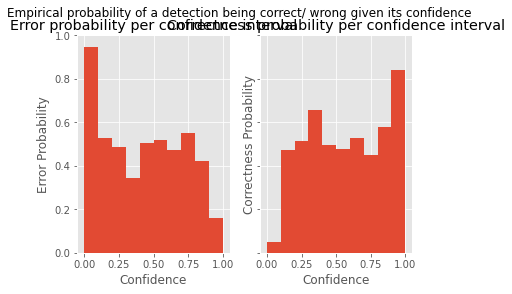

In [30]:
display(analysis_utilities.detection_correctness_by_confidence(df))

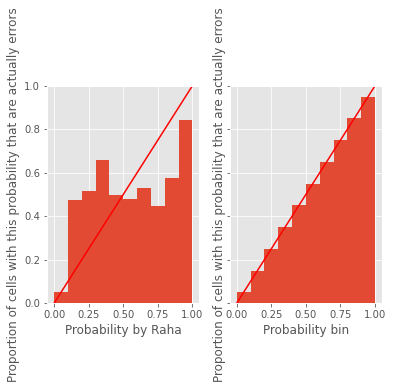

In [31]:
analysis_utilities.detection_correctness_by_confidence2(df, number_of_bins=10)

In [32]:
1 - ((df["p"] < 0.02) | (df["p"] > 0.98)).sum() / len(df.index)

0.0642376142376142

In [33]:
analysis_utilities.detection_evaluation(df, sharey="all",number_of_bins=100).savefig("flights_detection_split.pdf", dpi=600)

In [34]:
analysis_utilities.detection_evaluation_without_grouping(df,number_of_bins=100).savefig("flights_detection_overview.pdf", dpi=600)

In [35]:
(df["p"] >= 0.5).sum() / len(df.index)

0.30616883116883115

In [36]:
(df["p"] >= 0.99).sum() / len(df.index)

0.26447210197210197

In [37]:
(df["p"] >= 0.99).sum() / (df["p"] >= 0.5).sum()


0.863811319272613